# Plot bandpassed 3C signals of the entire array for the purpose of visualizing the deep harmonic tremors

In [32]:
# Import modules
from scipy.signal import hilbert
from obspy import read, UTCDateTime, Stream
from matplotlib.pyplot import figure, subplots
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from numpy import abs, mean, amin, amax
from pandas import read_csv, Timestamp, Timedelta, to_datetime
from os.path import join

from utils_basic import ROOTDIR_GEO, GEO_STATIONS, GEO_COMPONENTS, days_to_timestamps, save_figure
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_plot import plot_3c_seismograms

In [33]:
# Import modules
from obspy import read, UTCDateTime, Stream
from matplotlib.pyplot import figure, subplots
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from numpy import abs, mean, amin, amax
from pandas import read_csv, Timestamp, Timedelta
from os.path import join

from utils_basic import GEO_STATIONS_A, GEO_STATIONS_B, ROOTDIR_GEO
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_plot import plot_3c_seismograms, save_figure

In [34]:
# Inputs
starttime = Timestamp("2020-01-13T19:36:20")
dur = 15.0 # Duration in seconds

freqmin = 60
freqmax = 120

scale = 7.5e-3 # Scale factor for plotting
size = 20 # Size of the dots for detections

In [35]:
# Read and preprocess the data
stream = read_and_process_windowed_geo_waveforms(starttime, dur, freqmin=freqmin, freqmax=freqmax)

Could not find A12.GHZ
Could not find A12.GH1
Could not find A12.GH2
Could not find A18.GH1


Text(0.005, 0.995, 'Bandpass 60 to 120 Hz')

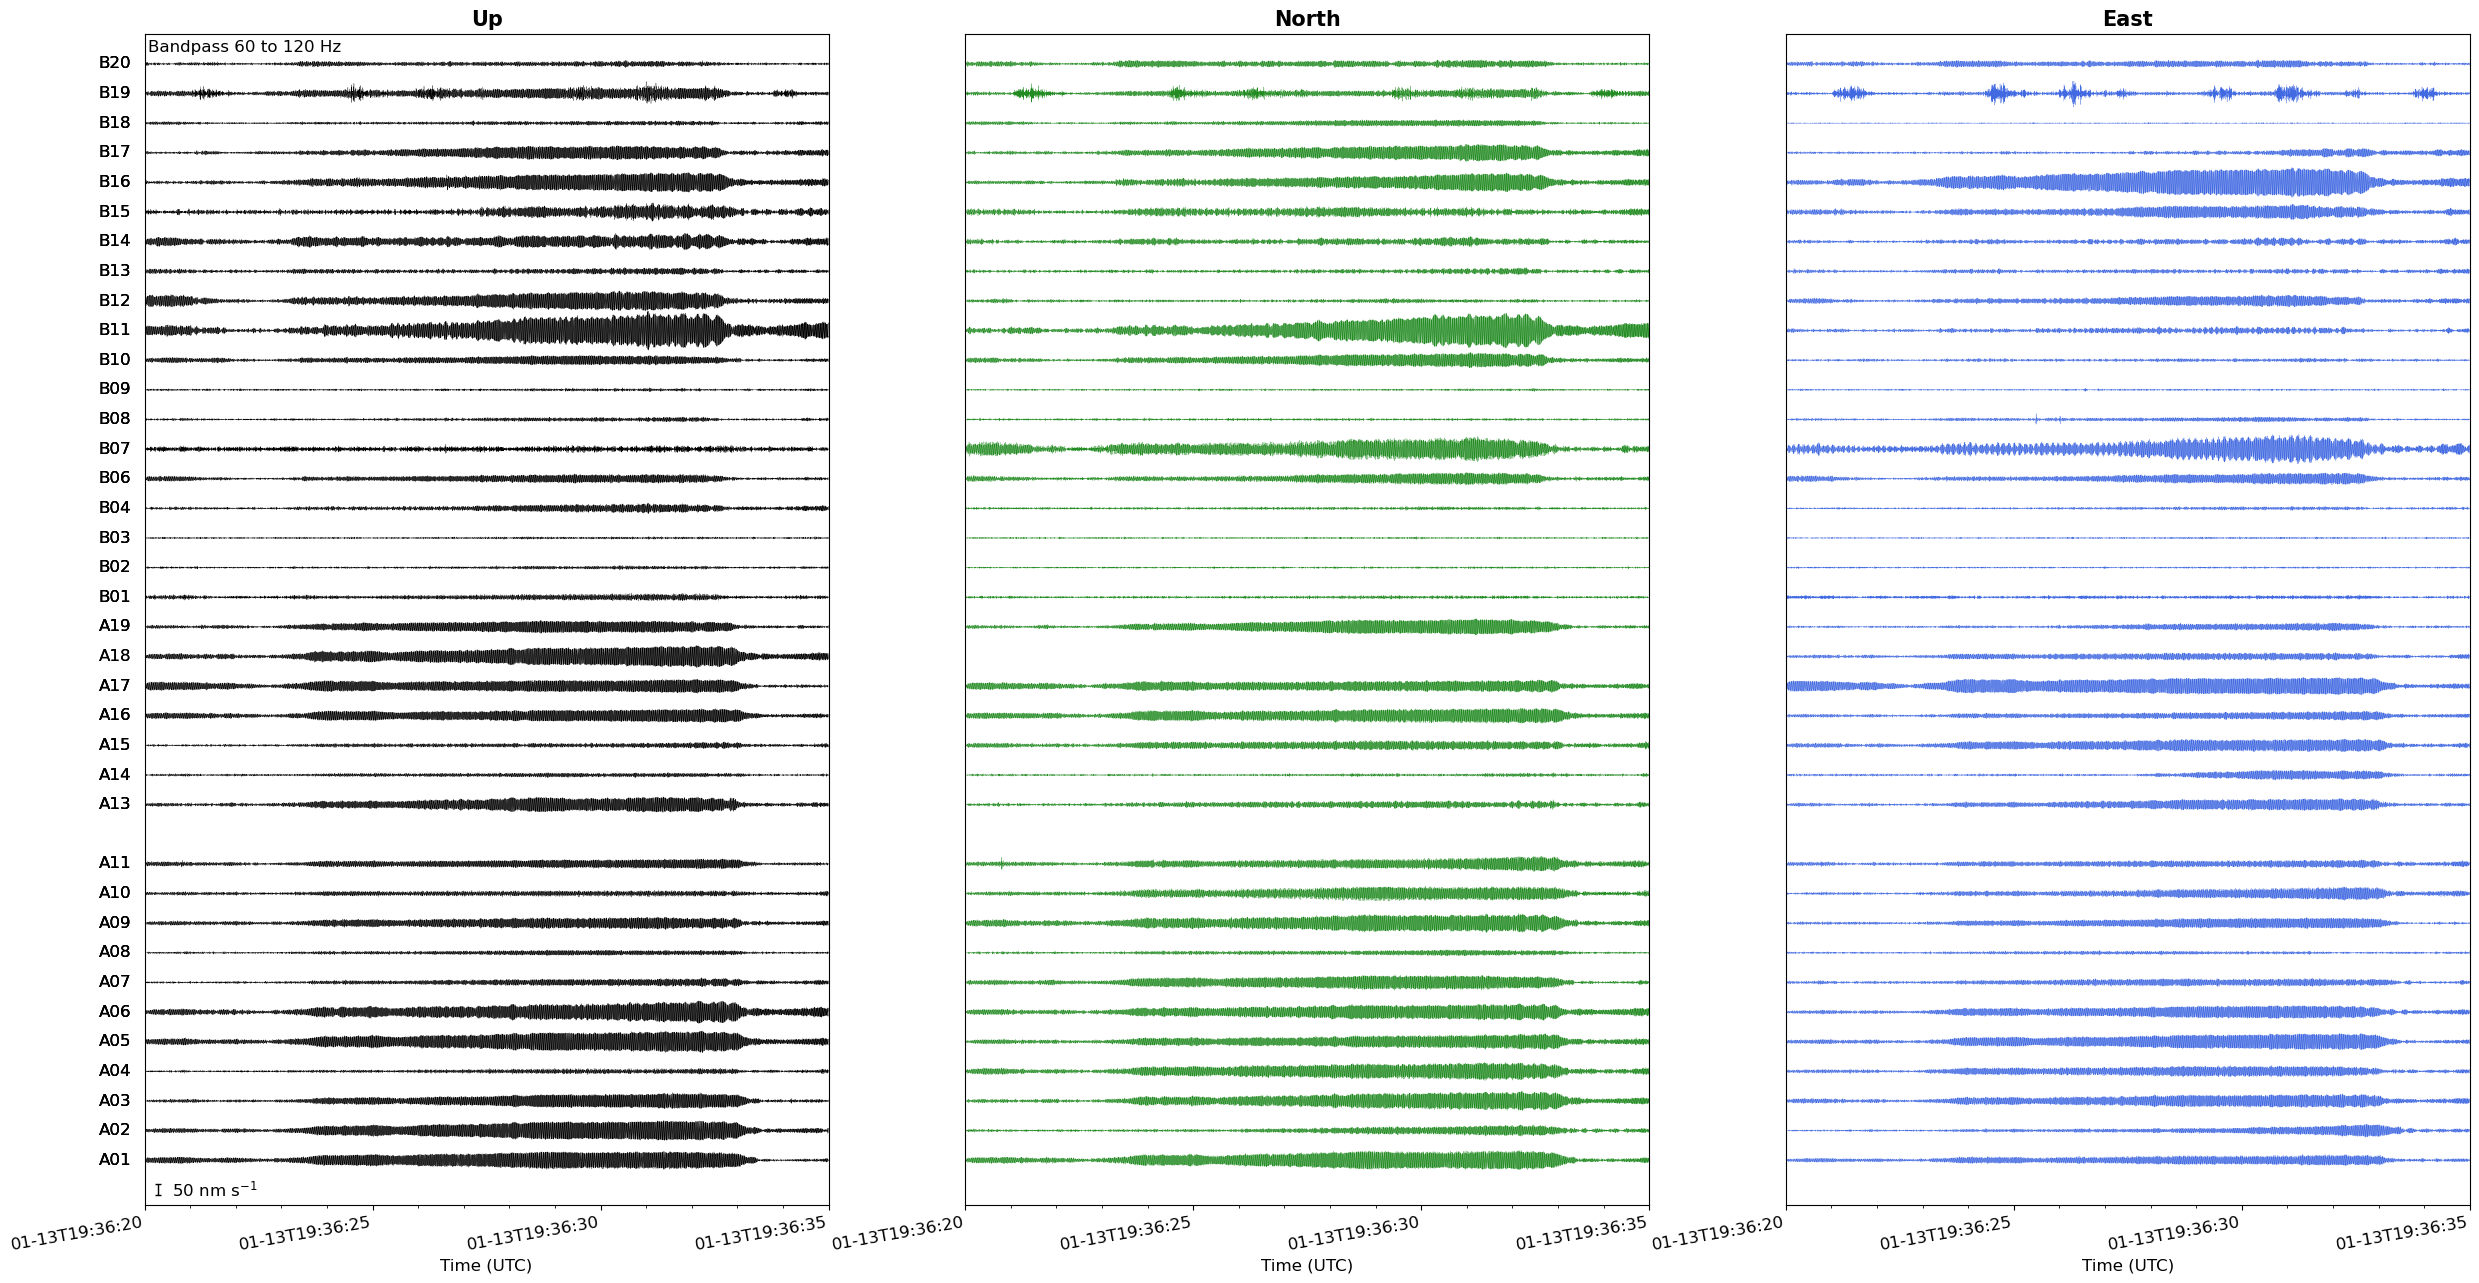

In [36]:
# Plotting
fig, axes = plot_3c_seismograms(stream, scale=scale, major_tick_spacing=5, minor_tick_spacing=1, xdim_per_comp=10, ydim_per_sta=0.4, scale_bar_amp=50, linewidth=0.2)

## Mark the frequency band
if freqmin is not None and freqmax is not None:
    freq_label = f"Bandpass {freqmin:.0f} to {freqmax:.0f} Hz"
elif freqmin is not None:
    freq_label = f"Highpass {freqmin:.0f} Hz"
elif freqmax is not None:
    freq_label = f"Lowpass {freqmax:.0f} Hz"
else:
    freq_label = "No filter"

ax = axes[0]
ax.text(0.005, 0.995, freq_label, transform=ax.transAxes, ha="left", va="top", fontsize=12, color="black")

In [37]:
# Save the figure
timestr = starttime.strftime('%Y-%m-%d-%H-%M-%S')
figname = f"deep_harmonic_tremor_waveforms_{timestr}_{dur:.0f}s.png"

save_figure(fig, figname, outdir=ROOTDIR_GEO)

Figure saved to /Volumes/OmanData/data/geophones/deep_harmonic_tremor_waveforms_2020-01-13-19-36-20_15s.png
